In [5]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

In [6]:
""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print 'Error rate: Training: %.4f - Test: %.4f' % err
    
""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

In [7]:
""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

In [8]:
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)


In [17]:
# Read data
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9
0,-0.640380,-1.485086,1.932970,-0.621763,0.523727,-2.552692,0.207254,0.512797,-0.162470,-0.217555
1,-0.797789,-0.492868,1.143052,0.323116,-0.328375,-0.009417,-2.926196,-0.419090,0.072923,1.715392
2,-0.738865,-0.311493,0.701830,1.349160,-0.004663,2.487555,0.780592,0.834030,0.036741,-0.112396
3,0.870156,-0.407685,1.008495,1.057553,-1.557470,1.671966,-0.280074,-1.485973,0.556382,0.373921
4,-0.752625,1.166887,-0.414001,1.227589,0.568895,0.029638,-0.135156,1.039154,-0.804337,0.704895
5,-0.495010,0.146006,-1.602215,-0.390413,-0.823844,-0.045434,-0.779230,-0.202555,1.355166,1.398654
6,0.795225,1.048465,-0.108126,-0.000443,-0.135016,1.773589,0.159627,-0.024658,-0.870730,-1.175930
7,1.770770,0.189246,0.330143,0.205509,-0.450206,-0.204941,1.838498,0.136079,0.205435,-0.143253
8,-0.005282,-0.582354,-1.678635,-0.791043,0.566101,1.051872,0.137134,-2.107452,-0.890787,-1.458054
9,0.054602,1.010183,1.918013,-0.205531,-0.286083,-1.104961,-0.609017,-0.655257,0.451189,-1.197871


In [19]:
df['Y'] = y
df

,0,1,2,3,4,5,6,7,8,9,Y
0,-0.640380,-1.485086,1.932970,-0.621763,0.523727,-2.552692,0.207254,0.512797,-0.162470,-0.217555,1.0
1,-0.797789,-0.492868,1.143052,0.323116,-0.328375,-0.009417,-2.926196,-0.419090,0.072923,1.715392,1.0
2,-0.738865,-0.311493,0.701830,1.349160,-0.004663,2.487555,0.780592,0.834030,0.036741,-0.112396,1.0
3,0.870156,-0.407685,1.008495,1.057553,-1.557470,1.671966,-0.280074,-1.485973,0.556382,0.373921,1.0
4,-0.752625,1.166887,-0.414001,1.227589,0.568895,0.029638,-0.135156,1.039154,-0.804337,0.704895,-1.0
5,-0.495010,0.146006,-1.602215,-0.390413,-0.823844,-0.045434,-0.779230,-0.202555,1.355166,1.398654,-1.0
6,0.795225,1.048465,-0.108126,-0.000443,-0.135016,1.773589,0.159627,-0.024658,-0.870730,-1.175930,-1.0
7,1.770770,0.189246,0.330143,0.205509,-0.450206,-0.204941,1.838498,0.136079,0.205435,-0.143253,-1.0
8,-0.005282,-0.582354,-1.678635,-0.791043,0.566101,1.051872,0.137134,-2.107452,-0.890787,-1.458054,1.0
9,0.054602,1.010183,1.918013,-0.205531,-0.286083,-1.104961,-0.609017,-0.655257,0.451189,-1.197871,-1.0


In [12]:
 # Split into training and test set
train, test = train_test_split(df, test_size = 0.2)
X_train, Y_train = train.ix[:,:-1], train.ix[:,-1]
X_test, Y_test = test.ix[:,:-1], test.ix[:,-1]

/home/blanca/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/blanca/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [24]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
5047,0.699139,0.592321,-1.058111,0.795987,-0.074800,0.407994,1.588433,-0.698540,-0.684622,0.117957
7510,0.749768,0.059892,-0.296813,1.832120,-1.954675,-0.216800,-0.661071,-1.157076,0.298731,-0.435018
5186,0.205986,1.072517,-0.759500,-1.363433,-0.897642,-1.651195,2.350771,-0.765364,-0.460839,-1.366852
3700,0.292841,0.599654,-0.375098,-0.677061,-0.913468,-0.474989,-0.892401,-2.696917,-0.212147,1.652880
5853,-2.538656,-0.356130,-1.733138,0.318827,0.674400,0.131123,0.089957,-0.406556,0.092580,-0.958419


In [20]:
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
er_tree

(0.4507291666666667, 0.46125)

In [14]:
# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(10, 410, 10)
for i in x_range:    
    er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])

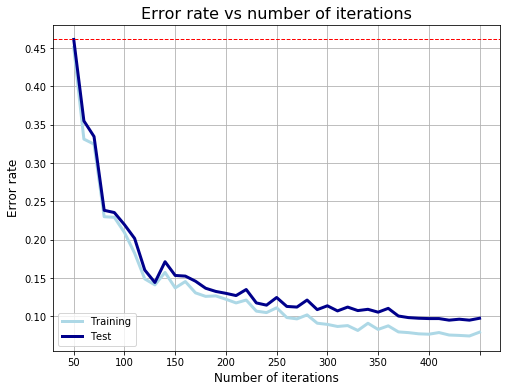

In [15]:
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)

In [21]:
er_train

[0.4507291666666667,
 0.33125,
 0.3246875,
 0.23,
 0.22916666666666666,
 0.209375,
 0.18239583333333334,
 0.14885416666666668,
 0.14104166666666668,
 0.15729166666666666,
 0.13708333333333333,
 0.14541666666666667,
 0.130625,
 0.12604166666666666,
 0.12666666666666668,
 0.12229166666666667,
 0.1175,
 0.12125,
 0.10677083333333333,
 0.10489583333333333,
 0.11114583333333333,
 0.0984375,
 0.09666666666666666,
 0.101875,
 0.09104166666666667,
 0.08947916666666667,
 0.08677083333333334,
 0.08791666666666667,
 0.0815625,
 0.0909375,
 0.08291666666666667,
 0.08760416666666666,
 0.0796875,
 0.07875,
 0.0771875,
 0.07666666666666666,
 0.07885416666666667,
 0.075625,
 0.07510416666666667,
 0.074375,
 0.079375]

In [22]:
er_test

[0.46125,
 0.355,
 0.33458333333333334,
 0.23833333333333334,
 0.23541666666666666,
 0.21958333333333332,
 0.20166666666666666,
 0.16041666666666668,
 0.14416666666666667,
 0.17125,
 0.15333333333333332,
 0.1525,
 0.14583333333333334,
 0.13666666666666666,
 0.1325,
 0.13,
 0.12708333333333333,
 0.135,
 0.1175,
 0.11458333333333333,
 0.12458333333333334,
 0.11291666666666667,
 0.11208333333333333,
 0.12125,
 0.10875,
 0.11375,
 0.10708333333333334,
 0.11208333333333333,
 0.1075,
 0.10916666666666666,
 0.10541666666666667,
 0.11041666666666666,
 0.10041666666666667,
 0.09833333333333333,
 0.0975,
 0.09708333333333333,
 0.09708333333333333,
 0.095,
 0.09625,
 0.095,
 0.0975]